## Imports and Packages

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple cost function
### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3,stop = 3, num = 500)
x_1

array([-3.        , -2.98797595, -2.9759519 , -2.96392786, -2.95190381,
       -2.93987976, -2.92785571, -2.91583166, -2.90380762, -2.89178357,
       -2.87975952, -2.86773547, -2.85571142, -2.84368737, -2.83166333,
       -2.81963928, -2.80761523, -2.79559118, -2.78356713, -2.77154309,
       -2.75951904, -2.74749499, -2.73547094, -2.72344689, -2.71142285,
       -2.6993988 , -2.68737475, -2.6753507 , -2.66332665, -2.65130261,
       -2.63927856, -2.62725451, -2.61523046, -2.60320641, -2.59118236,
       -2.57915832, -2.56713427, -2.55511022, -2.54308617, -2.53106212,
       -2.51903808, -2.50701403, -2.49498998, -2.48296593, -2.47094188,
       -2.45891784, -2.44689379, -2.43486974, -2.42284569, -2.41082164,
       -2.3987976 , -2.38677355, -2.3747495 , -2.36272545, -2.3507014 ,
       -2.33867735, -2.32665331, -2.31462926, -2.30260521, -2.29058116,
       -2.27855711, -2.26653307, -2.25450902, -2.24248497, -2.23046092,
       -2.21843687, -2.20641283, -2.19438878, -2.18236473, -2.17

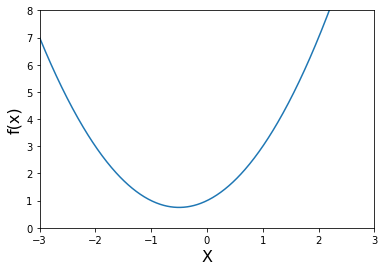

In [4]:
# Plotting the data
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

## Slope & derivatives

Creating the python function for the derivative of $f(x)$ called $df(x)$

**The Formula for derivative is:**

$$\frac d{dx}x^n = n. x^{n-1}$$

In [5]:
def df(x):
    return 2*x + 1

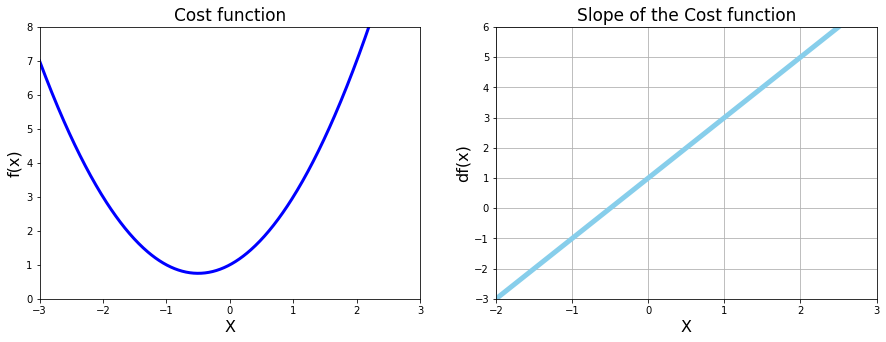

In [6]:
# Plot function and derviative side by side
plt.figure(figsize=[15,5])
# First Chart
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_1,f(x_1) , c='blue', linewidth=3)

# Second chart of the derivative

plt.subplot(1,2,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.plot(x_1,df(x_1), c='skyblue', linewidth=5)

plt.show()

## Gradient Descent Algorithm


In [7]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Hitup', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or d(x) value at this poibt is', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Hitup 61
Local minimum occurs at:  -0.4999965672099885
Slope or d(x) value at this poibt is 6.8655800230521535e-06
f(x) value or cost at this point is:  0.750000000011784


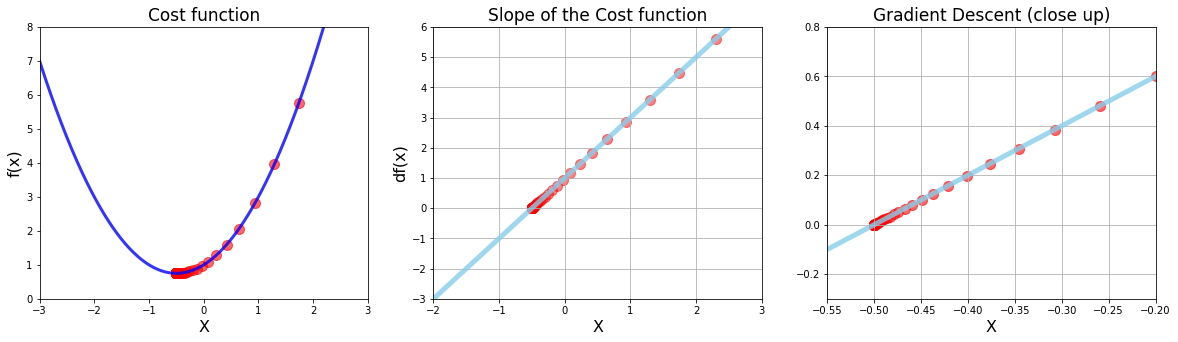

In [8]:
# Superimporse the graident descent calculations 
plt.figure(figsize=[20,5])
# First Chart
plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_1,f(x_1) , c='blue', linewidth=3,alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list, f(values), c='r',s=100, alpha=0.6)
# Second chart of the derivative

plt.subplot(1,3,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.plot(x_1,df(x_1), c='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, c='r', s=100, alpha=0.5)
# Third chart of the derivative

plt.subplot(1,3,3)
plt.xlabel('X', fontsize=16)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.grid()
plt.xlim(-0.55,-0.20)
plt.ylim(-0.3,0.8)
plt.plot(x_1,df(x_1), c='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, c='r', s=100, alpha=0.6)
plt.show()


## Example 2 - Multiple Minima vs Initial Guess & Advance Fucntions 

$$ g(x) = x^4 - 4x^2 + 5 $$

In [9]:
# Make some data
x_2 = np.linspace(-2,2,1000)

In [10]:
# Write a g(x) function 
def g(x):
    return x**4 - 4*(x**2) + 5

In [11]:
#Write the dg(x) function in python 
def dg(x):
    return 4*(x**3) - 8*x

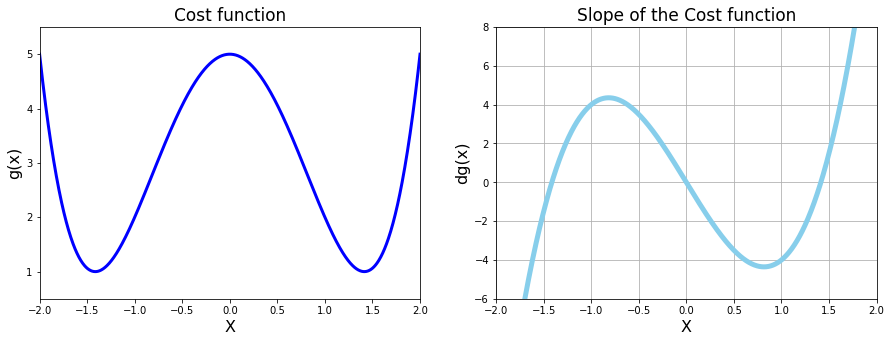

In [12]:
# Plot function and derviative side by side
plt.figure(figsize=[15,5])
# First Chart
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_2,g(x_2) , c='blue', linewidth=3)

# Second chart of the derivative

plt.subplot(1,2,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2), c='skyblue', linewidth=5)

plt.show()

### Gradient Descent as a python function

In [13]:
def gradient_descent(derivative_function, initial_guess, multiplier=0.02,precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_function(new_x)]
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_function(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_function(new_x))
        if step_size < precision:
            break
    return new_x,x_list,slope_list

In [14]:
local_min , list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=0.5, multiplier=0.02, precision=0.001)
print("Local Min occurs at:", local_min)
print("Numbers of step:", len(list_x))

Local Min occurs at: 1.4122375085019094
Numbers of step: 23


In [15]:
local_min , list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=-0.5, multiplier=0.02, precision=0.001)
print("Local Min occurs at:", local_min)
print("Numbers of step:", len(list_x))

Local Min occurs at: -1.4122375085019094
Numbers of step: 23


In [16]:
local_min , list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=-0.1)
print("Local Min occurs at:", local_min)
print("Numbers of step:", len(list_x))

Local Min occurs at: -1.4120887490901561
Numbers of step: 34


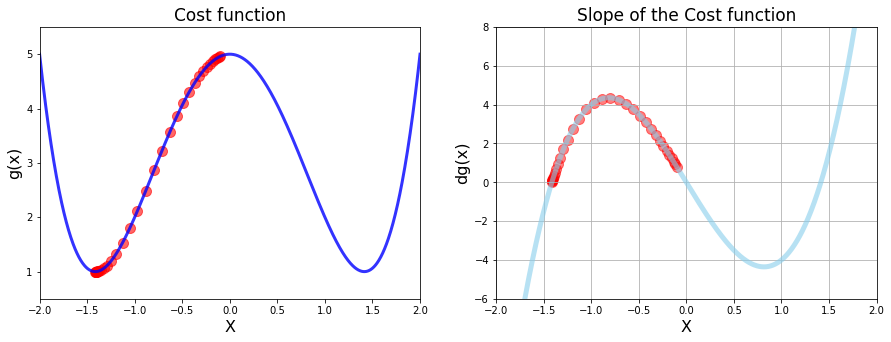

In [17]:
# Calling gradient descent function 
local_min , list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=-.1)
# Plot function and derviative side by side and scatter plot side by side

plt.figure(figsize=[15,5])
# First Chart
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_2,g(x_2) , c='blue', linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), c='r',s=100,alpha=0.6)
# Second chart of the derivative

plt.subplot(1,2,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2), c='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deriv_list, c='r',s=100,alpha=0.5)
plt.show()

## Example 3 - Divergence, Overflow and Python Tuples

$$h(x) = x^5 - 2x^4 + 2 $$

In [18]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

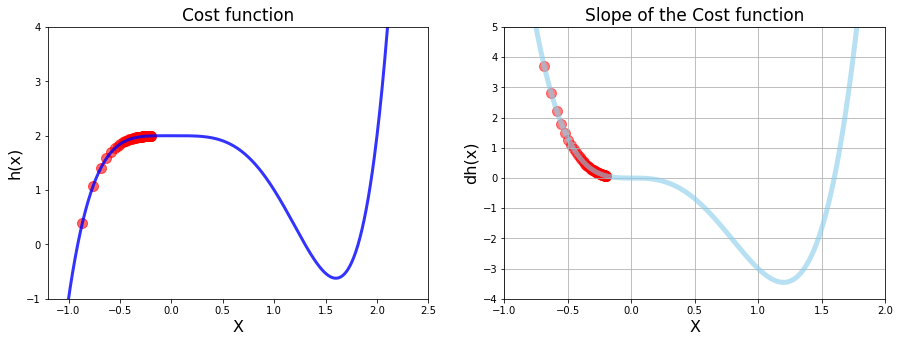

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps 72


In [19]:
# Calling gradient descent function 
local_min , list_x, deriv_list = gradient_descent(derivative_function=dh, initial_guess= -0.2,max_iter=71)
# Plot function and derviative side by side and scatter plot side by side

plt.figure(figsize=[15,5])
# First Chart
plt.subplot(1,2,1)
plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_3,h(x_3) , c='blue', linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)), c='r',s=100,alpha=0.6)
# Second chart of the derivative

plt.subplot(1,2,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.plot(x_3,dh(x_3), c='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deriv_list, c='r',s=100,alpha=0.5)
plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps', len(list_x))

## The Learning Rate

**In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function. Since it influences to what extent newly acquired information overrides old information, it metaphorically represents the speed at which a machine learning model "learns".**

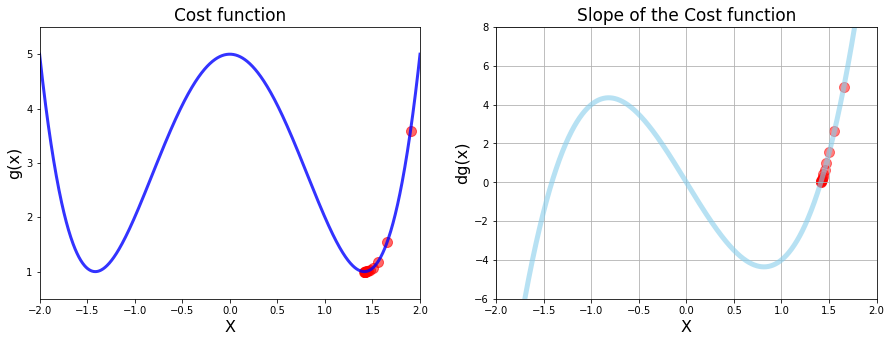

Number of the Steps:  14


In [20]:
# Calling gradient descent function 
local_min , list_x, deriv_list = gradient_descent(derivative_function=dg, 
                        initial_guess=1.9, multiplier=0.02 ,  max_iter=500)
# Plot function and derviative side by side and scatter plot side by side

plt.figure(figsize=[15,5])
# First Chart
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_2,g(x_2) , c='blue', linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), c='r',s=100,alpha=0.6)
# Second chart of the derivative

plt.subplot(1,2,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2), c='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deriv_list, c='r',s=100,alpha=0.5)
plt.show()
print('Number of the Steps: ', len(list_x))

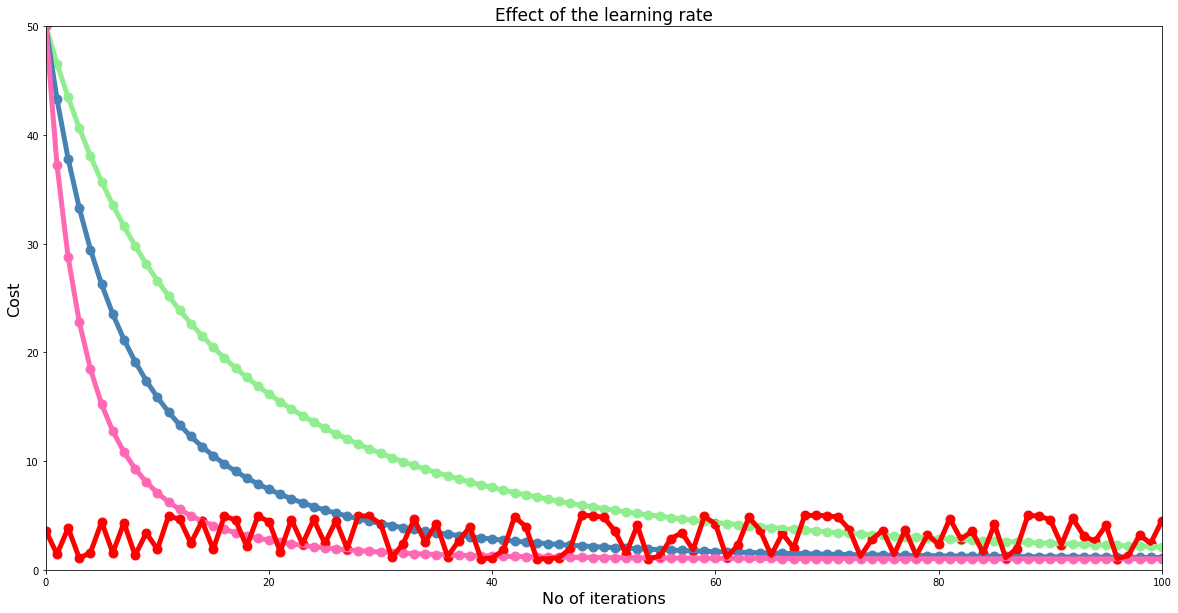

In [21]:
# running Gradient Descent 3 times
n = 100
# Low Gamma
low_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=3, multiplier=0.0005, precision=0.0001,   max_iter=n)

# mid gamma
mid_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=3, multiplier=0.001, precision=0.0001,   max_iter=n)
# High Gamma
high_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=3, multiplier=0.002, precision=0.0001,   max_iter=n)

# Insane Gamma
insane_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=1.9, multiplier=0.25, precision=0.0001,   max_iter=n)
# Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])
# First Chart
plt.xlim(0,n)
plt.ylim(0,50)
plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our Charts
# 1) Y axis Data: convert the list to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
# 2) X axis Data : create a list from 0 to n+1
iteration_list = list(range(0,n+1))
# Plotting Low learning rate
plt.plot(iteration_list,g(low_values) , c='lightgreen', linewidth=5)
plt.scatter(iteration_list,g(low_values), c='lightgreen',s=80)

# Plotting Mid learning rate
plt.plot(iteration_list,g(mid_values) , c='steelblue', linewidth=5)
plt.scatter(iteration_list,g(mid_values), c='steelblue',s=80)

# Plotting High learning rate
plt.plot(iteration_list,g(high_values) , c='hotpink', linewidth=5)
plt.scatter(iteration_list,g(high_values), c='hotpink',s=80)

# Plotting Insane learning rate
plt.plot(iteration_list,g(np.array(insane_gamma[1])) , c='red', linewidth=5)
plt.scatter(iteration_list,g(np.array(insane_gamma[1])), c='red',s=80)

plt.show()


### Picking the Learning rate is both a bit of art and science.


[Tuning the learning rate in Gradient Descent](https://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/)

## Example 4 - Data Visualization with 3D Charts

### Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [22]:
def f(x,y):
    r = 3 ** (-x**2 - y **2)
    return 1 / (r + 1)

In [23]:
# Make our x and y data
x_4  = np.linspace(start=-2,stop=2,num=200)
y_4  = np.linspace(start=-2,stop=2,num=200)
print('Shape of x Array ', x_4.shape)
x_4 , y_4 = np.meshgrid(x_4,y_4)
print('Array after meshgrid', x_4.shape)

Shape of x Array  (200,)
Array after meshgrid (200, 200)


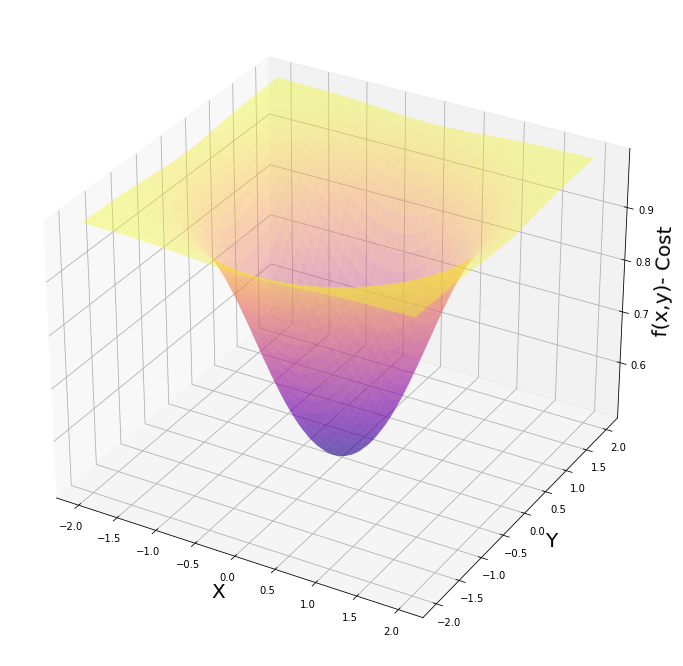

In [24]:
# generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)- Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.plasma, alpha=0.4)
plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y ^2}}{\left( 3^{-x^2-y^2} + 1 \right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y ^2}}{\left( 3^{-x^2-y^2} + 1 \right)^2}$$

In [25]:
a,b = symbols('x,y')
print('Our cost function f(x,y) is: ')
f(a,b)

Our cost function f(x,y) is: 


1/(3**(-x**2 - y**2) + 1)

In [26]:
print('Partial derivative wrt x is: ')
diff(f(a,b),a)

Partial derivative wrt x is: 


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [27]:
print('Value of f(x,y) at x=1.8 y=1.0 is : ', f(a,b).evalf(subs={a:1.8, b:1.0}))


Value of f(x,y) at x=1.8 y=1.0 is :  0.990604794032582


In [28]:
print('Value of Parital derivative wrt x at x=1.8 y=1.0 is : ', diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))

Value of Parital derivative wrt x at x=1.8 y=1.0 is :  0.0368089716197505


## Batch Gradient Descent with SymPy

In [29]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) # Initial Guess
for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [30]:

# partial derivative function examples 4
def fpx(x,y):
    return 2 * 3 ** (-x ** 2 - y ** 2) * x * log(3) / (3 ** (-x ** 2 - y ** 2) + 1) ** 2

# partial derivative function examples 4
def fpy(x,y):
    return 2 * 3 ** (-x ** 2 - y ** 2) * y * log(3) / (3 ** (-x ** 2 - y ** 2) + 1) ** 2

In [31]:

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) # Initial Guess
for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


### Graphing 3D Gradient Descent & Adv Numpy Arrays

In [32]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) # Initial Guess
values_arr = params.reshape(1,2)
print(values_arr)
for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    values_arr = np.append(values_arr, params.reshape(1,2),axis=0)
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

[[1.8 1. ]]
Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


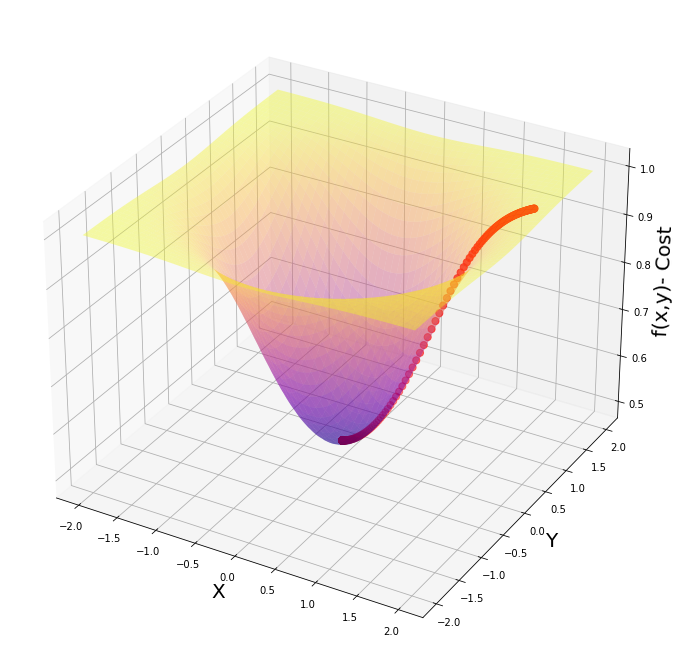

In [33]:
# generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)- Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.plasma, alpha=0.4)
ax.scatter(values_arr[:, 0],values_arr[:,1], f(values_arr[:, 0], values_arr[:, 1]), s=50, c='r')
plt.show()

# Example 5 - Working with Data and Cost Function

## Mean Square Error: A cost Function for regression problems

$$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$


$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [41]:
# Make sample data
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5])
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2])
print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

# two ways of transforming data
x_5 = np.array([x_5]).transpose()
y_5 = y_5.reshape(7,1)
print('New Shape of x_5 array: ', x_5.shape)
print('New Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7,)
Shape of y_5 array:  (7,)
New Shape of x_5 array:  (7, 1)
New Shape of y_5 array:  (7, 1)


In [43]:
# Quick Linear Regression 
np.random.seed(42)
regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


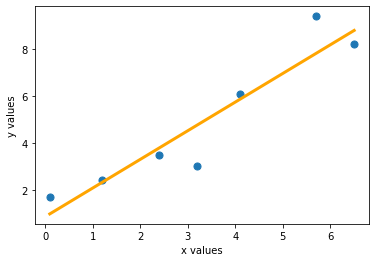

In [44]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5,regr.predict(x_5),c='orange',linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [46]:
# y_hat = theta0 + theta1*x

y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print('Est values y_hat are: \n', y_hat)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [47]:
print('In comparison, the actual y values are \n', y_5)

In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [48]:
# Python function mse(y,y_hat)

def mse(y,y_hat):
    return np.average((y - y_hat) **2,axis = 0 )
#     return (1/y.size) * sum((y - y_hat)**2)

In [52]:
print('Manually calculated MSE is:', mse(y_5,y_hat))
print('MSE regression using manual calc is :', mean_squared_error(y_5, y_hat))
print('MSE regression is :', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is : 0.9479655759794577
MSE regression is : 0.9479655759794577


## 3D plot for the MSE Cost Fucntion

### Make data for thetas

In [68]:
nr_thetas = 200
th_0 = np.linspace(start=-1,stop=3,num=nr_thetas)
th_1 = np.linspace(start=-1,stop=3,num=nr_thetas)
plot_t0 , plot_t1 = np.meshgrid(th_0,th_1)
th_0.shape, plot_t0.shape

((200,), (200, 200))

## Calc MSE using nested for loops

In [69]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5,y_hat)
        
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


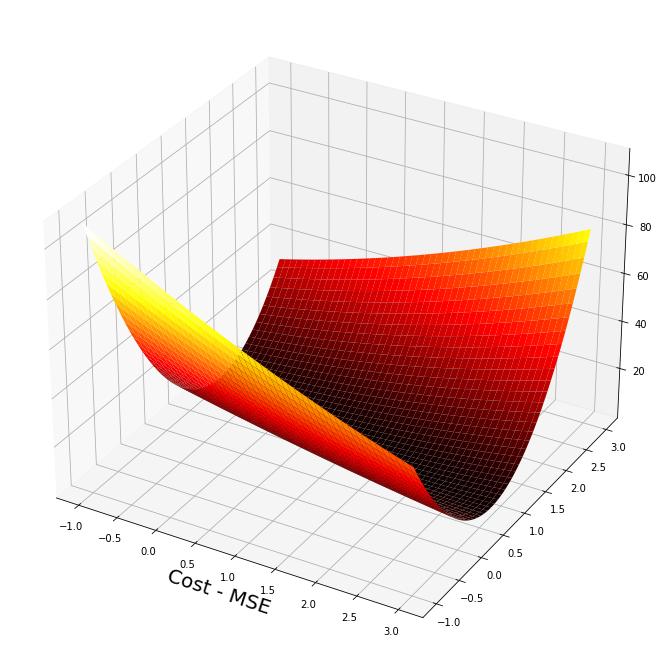

In [72]:
# pltting an mse
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('Cost - MSE', fontsize=20) 
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plt.show()

In [78]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j): ',ij_min)
print('Min MSE for theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j):  (111, 91)
Min MSE for theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for theta 1 at plot_t1[111][91] 1.2311557788944723


$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - (\theta_0 + \theta_1x  ) \big)^2 $$

$$ MSE = \frac{1}{n} \sum_{i=1}^n \big( y^2 - 2\theta_0y - 2\theta_1xy + \theta_0^2 + 2\theta_0\theta_1x + \theta_1^2x^2 \big) $$

## Derivates w.r.t $ \partial\theta_0 $

$$ \frac{\partial MSE}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^n \big( -2y + 2\theta_0 + 2\theta_1x  \big)  $$

### Result
$$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^n \big( y^{(i)} - \theta_0 - \theta_1x^{(i)}  \big)  $$

## Derivates w.r.t $ \partial\theta_1 $


$$ \frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^n \big( y^{(i)} - \theta_0 - \theta_1x^{(i)}  \big) \big( x^{(i)} \big)  $$

## MSE & Gradient Descent

**x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)**

In [105]:
def grad(x,y,thetas):
    n = y.size
    theta0_slope = (- 2 / n) * (sum(y - thetas[0] - thetas[1] * x))
    theta1_slope = (- 2 / n) * (sum((y - thetas[0] - thetas[1] * x) *x))
    return np.concatenate((theta0_slope,theta1_slope),axis=0)

In [106]:
## Ways to give output in MSE function
#     return np.concatenate((theta0_slope,theta1_slope),axis=0)
#     return np.array([theta0_slope[0],theta1_slope[1]])
#     return np.append(arr=theta0_slope,values=theta1_slope)

In [113]:
multiplier = 0.01
thetas = np.array([2.9,2.9])
# Collect data points for scatter plot

plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5,thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5,y_5,thetas)
    plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5,thetas[0] + thetas[1]*x_5))
# Results 
print('Min occurs at Theta 0: ', thetas[0])
print('Min occurs at Theta 1: ', thetas[1])
print('MSE is: ', mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0:  0.8532230461743415
Min occurs at Theta 1:  1.2214935332607393
MSE is:  [0.94797511]


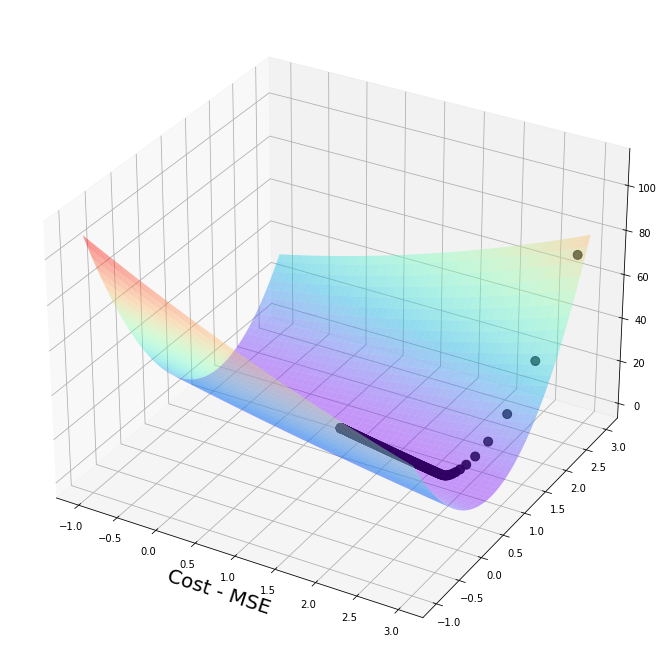

In [115]:
# pltting an mse
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('Cost - MSE', fontsize=20) 
ax.scatter(plot_vals[ : , 0],plot_vals[ : ,1] ,mse_vals, s=80, c='black')
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow, alpha=0.4)
plt.show()